## Traditional ROC Curve:

- **True Positive Rate (Sensitivity):** Measures the proportion of actual positives correctly identified.
- **False Positive Rate:** Measures the proportion of actual negatives incorrectly identified as positives.

## Adapted ROC Concept:

- **Coverage Rate:** Represents the proportion of hazards and consequences covered by the selected indicators.
- **Number of Indicators Selected:** Serves as the threshold parameter, analogous to the decision threshold in ROC curves.

## Purpose:

- To visualize how the coverage of hazards and consequences increases as more indicators are selected.
- To assess the efficiency of the optimisation algorithm in maximizing coverage with a minimal number of indicators.


In [42]:
import pandas as pd
import time
DATA_PATH = "../data/dairy_cows.csv"  # or wherever your data is located

df = pd.read_csv(DATA_PATH)
df.head()

,ID,Species,Animal_Class,WQ_Principles,WQ_Criteria,Welfare_Hazards_Animal,Welfare_Hazards_Consequences,Welfare_Hazards_Affective_States,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Welfare_Indicator,Indicator_Type,Indicator_Dimensions,Indicator_Ease,Indicator_Resources,Hazards_Source_1,Hazards_Source_2,Global_Usage,Norway_Usage
0,1,Dairy cows,Tie stalls,Good Health,Absence of disease,Pasture access,Gastro-enteric disorders,Discomfort,High,Moderate,Abdominal discomfort,Welfare outcome,Health/physical/production,Moderate,Low,7.0,NaN,F,Y
1,1,Dairy cows,Cubicles,Good Health,Absence of disease,Pasture access,Gastro-enteric disorders,Discomfort,High,Moderate,Abdominal discomfort,Welfare outcome,Health/physical/production,Moderate,Low,7.0,NaN,F,Y
2,2,Dairy cows,Tie stalls,Appropiate behaviour,Expression of social behaviours,Continuous housing for long periods,General disruption of behaviour,Di(stress),Low,Difficult,Agonistic behaviour,Welfare outcome,Behavioural,Moderate,Low,7.0,NaN,"F, R",Y
3,2,Dairy cows,Cubicles,Appropiate behaviour,Expression of social behaviours,Continuous housing for long periods,General disruption of behaviour,Di(stress),Low,Difficult,Agonistic behaviour,Welfare outcome,Behavioural,Moderate,Low,7.0,NaN,"F, R",Y
4,3,Dairy cows,Tie stalls,Appropiate behaviour,Expression of other behaviours,Insufficient space,Restriction of movement,Discomfort,High,Moderate,Agonistic interactions,Welfare outcome,Behavioural,Moderate,Medium,NaN,13a,R,N (research only)


In [43]:

def parse_hazards_and_consequences(df):
    """
    For each row (indicator), convert 'Welfare_Hazards_Animal' and
    'Welfare_Hazards_Consequences' into Python sets.
    """
    # Example: if columns can be comma-separated, do:
    # row['Welfare_Hazards_Animal'].split(',')
    # But if they are single strings, keep them as sets of length 1.
    
    hazards = []
    consequences = []
    
    for _, row in df.iterrows():
        animal_str = row['Welfare_Hazards_Animal']
        cons_str = row['Welfare_Hazards_Consequences']
        
        # Convert to set (handle comma separation if needed)
        animal_set = {x.strip() for x in animal_str.split(',')} if ',' in animal_str else {animal_str}
        cons_set = {x.strip() for x in cons_str.split(',')} if ',' in cons_str else {cons_str}
        
        hazards.append(animal_set)
        consequences.append(cons_set)
    
    return hazards, consequences

hazards_list, consequences_list = parse_hazards_and_consequences(df)

# Let's see an example of parsing
for i in range(len(df)):
    print(f"Indicator {df.loc[i, 'ID']}:")
    print("  Hazards:     ", hazards_list[i])
    print("  Consequences:", consequences_list[i])


Indicator 1:
  Hazards:      {'Pasture access'}
  Consequences: {'Gastro-enteric disorders'}
Indicator 1:
  Hazards:      {'Pasture access'}
  Consequences: {'Gastro-enteric disorders'}
Indicator 2:
  Hazards:      {'Continuous housing for long periods'}
  Consequences: {'General disruption of behaviour'}
Indicator 2:
  Hazards:      {'Continuous housing for long periods'}
  Consequences: {'General disruption of behaviour'}
Indicator 3:
  Hazards:      {'Insufficient space'}
  Consequences: {'Restriction of movement'}
Indicator 3:
  Hazards:      {'Insufficient space'}
  Consequences: {'Restriction of movement'}
Indicator 4:
  Hazards:      {'Inadequate flooring in passageways', 'feeding and milking areas'}
  Consequences: {'Inability to perform comfort behaviour'}
Indicator 4:
  Hazards:      {'Inadequate flooring in passageways', 'feeding and milking areas'}
  Consequences: {'Inability to perform comfort behaviour'}
Indicator 5:
  Hazards:      {'Continuous housing for long periods'}

In [45]:
selection_order, coverage_history = greedy_cover(df, hazards_list, consequences_list)

print("Greedy selection order (DataFrame index):", selection_order)
print("Coverage after each pick (hazards, consequences):")
for step, (hz, cs) in enumerate(coverage_history, 1):
    print(f" Step {step}: hazards={hz}, consequences={cs}")


Greedy selection order (DataFrame index): [42, 6, 256, 0, 2, 4, 10, 14, 24, 26, 36, 58, 66, 84, 114, 120, 144, 188, 278, 346, 12, 16, 18, 20, 28, 30, 44, 46, 48, 50, 52, 54, 56, 60, 72, 74, 92, 118, 124, 126, 148, 162, 190, 204, 214, 238, 280, 374]
Coverage after each pick (hazards, consequences):
 Step 1: hazards=3, consequences=1
 Step 2: hazards=5, consequences=2
 Step 3: hazards=7, consequences=3
 Step 4: hazards=8, consequences=4
 Step 5: hazards=9, consequences=5
 Step 6: hazards=10, consequences=6
 Step 7: hazards=11, consequences=7
 Step 8: hazards=12, consequences=8
 Step 9: hazards=13, consequences=9
 Step 10: hazards=14, consequences=10
 Step 11: hazards=15, consequences=11
 Step 12: hazards=16, consequences=12
 Step 13: hazards=17, consequences=13
 Step 14: hazards=18, consequences=14
 Step 15: hazards=19, consequences=15
 Step 16: hazards=20, consequences=16
 Step 17: hazards=21, consequences=17
 Step 18: hazards=22, consequences=18
 Step 19: hazards=23, consequences=19
 S

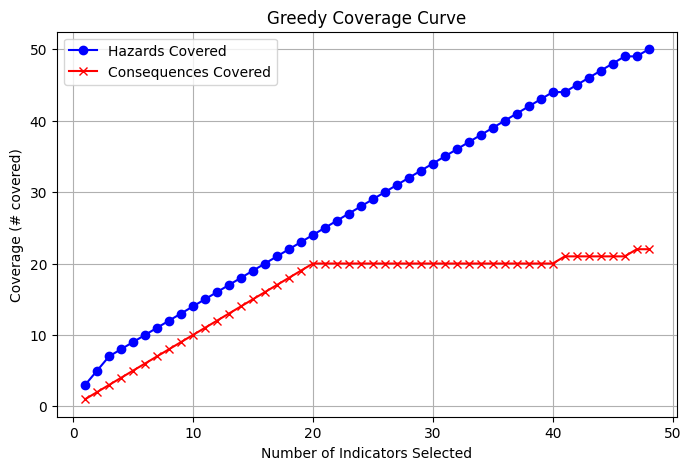

In [48]:
import matplotlib.pyplot as plt
def plot_coverage_curve(coverage_history):
    """
    coverage_history is a list of (covered_hazards, covered_consequences) after each pick.
    We'll plot the coverage vs the number of indicators selected.
    """
    steps = range(1, len(coverage_history) + 1)
    hazards_covered = [c[0] for c in coverage_history]
    consequences_covered = [c[1] for c in coverage_history]
    
    plt.figure(figsize=(8,5))
    
    # If you want separate lines for hazards vs. consequences:
    plt.plot(steps, hazards_covered, marker='o', label='Hazards Covered', color='blue')
    plt.plot(steps, consequences_covered, marker='x', label='Consequences Covered', color='red')
    
    # Or if you prefer total coverage:
    # total_covered = [hc + cc for hc, cc in coverage_history]
    # plt.plot(steps, total_covered, marker='o', label='Total Coverage', color='green')
    
    plt.xlabel('Number of Indicators Selected')
    plt.ylabel('Coverage (# covered)')
    plt.title('Greedy Coverage Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Let's plot for our coverage_history
plot_coverage_curve(coverage_history)


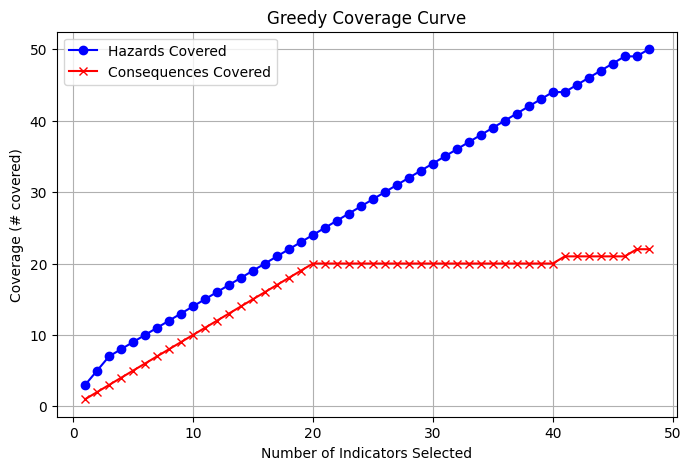

In [49]:
def plot_coverage_curve(coverage_history):
    """
    coverage_history is a list of (covered_hazards, covered_consequences) after each pick.
    We'll plot the coverage vs the number of indicators selected.
    """
    steps = range(1, len(coverage_history) + 1)
    hazards_covered = [c[0] for c in coverage_history]
    consequences_covered = [c[1] for c in coverage_history]
    
    plt.figure(figsize=(8,5))
    
    # If you want separate lines for hazards vs. consequences:
    plt.plot(steps, hazards_covered, marker='o', label='Hazards Covered', color='blue')
    plt.plot(steps, consequences_covered, marker='x', label='Consequences Covered', color='red')
    
    # Or if you prefer total coverage:
    # total_covered = [hc + cc for hc, cc in coverage_history]
    # plt.plot(steps, total_covered, marker='o', label='Total Coverage', color='green')
    
    plt.xlabel('Number of Indicators Selected')
    plt.ylabel('Coverage (# covered)')
    plt.title('Greedy Coverage Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Let's plot for our coverage_history
plot_coverage_curve(coverage_history)


In [36]:
def compute_multi_objective(row, alpha=2.0, beta=1.0, w_cover=1.0, w_ease=1.0, w_impact=1.0, w_miti=1.0):
    """
    Compute the multi-objective score for an indicator.
    
    Parameters:
    - row: DataFrame row
    - alpha: Weight for hazard coverage
    - beta: Weight for consequence coverage
    - w_cover: Overall weight for coverage
    - w_ease: Weight for easiness
    - w_impact: Weight for impact
    - w_miti: Weight for mitigation ease
    
    Returns:
    - multi_obj: Combined objective score
    """
    # Coverage = alpha * n_hazards + beta * n_consequences
    coverage = alpha * row['n_hazards'] + beta * row['n_consequences']
    
    # Easiness Score: higher is better (e.g., 3 for 'Easy'=1, 2 for 'Moderate'=2, 1 for 'Difficult'=3)
    # Reverse the mapping
    easiness = 4 - row['Ease_Num']
    
    # Impact Score: higher is better
    impact = row['Impact_Num']
    
    # Mitigation Ease Score: higher is better (easier to mitigate)
    mitigation_ease = 4 - row['Ease_Num']  # Assuming similar to Ease_Num
    
    # Combined Objective
    multi_obj = (
        w_cover * coverage +
        w_ease * easiness +
        w_impact * impact +
        w_miti * mitigation_ease
    )
    
    return multi_obj


In [37]:
# Apply the multi-objective function to each row
df_agg['Multi_Objective'] = df_agg.apply(compute_multi_objective, axis=1)

df_agg


,Welfare_Indicator,n_hazards,n_consequences,Impact_Num,Ease_Num,Resources_Num,Total_Cost,Total_Time,Multi_Objective
0,Abdominal discomfort,1,1,2.000000,2.000000,1.0,250,10,9.000000
1,Agonistic behaviour,1,1,1.000000,3.000000,1.0,350,14,6.000000
2,Agonistic interactions,1,1,2.000000,2.000000,2.0,300,12,9.000000
3,Allo-grooming,2,1,1.000000,3.000000,2.0,400,16,8.000000
4,Altered resting posture,1,1,2.000000,3.000000,1.0,350,14,7.000000
5,Amount of eye white,2,1,2.000000,2.000000,2.0,600,24,11.000000
6,Body condition scoring,4,1,2.000000,1.500000,1.0,800,32,16.000000
7,Brush use,2,1,1.000000,3.000000,2.0,400,16,8.000000
8,Calving behaviour (difficult/long calving),1,1,2.000000,2.000000,1.0,250,10,9.000000
9,Calving records (death of cow),3,1,2.000000,1.333333,1.0,550,22,14.333333


In [38]:
import time

def select_best_indicators_greedy_with_coverage(df_agg, budget, deadline, max_indic, heuristic='score_per_cost'):
    """
    Greedy selection function that tracks cumulative coverage of hazards and consequences.
    
    Parameters:
    - df_agg (DataFrame): Aggregated DataFrame with indicators and scores.
    - budget (float): Total budget constraint.
    - deadline (float): Total time constraint.
    - max_indic (int): Maximum number of indicators to select.
    - heuristic (str): Heuristic to prioritize indicators. Options:
        - 'score_per_cost': Objective score divided by cost.
        - 'score_per_time': Objective score divided by time.
        - 'combined': (Objective score) / (cost + time).
    
    Returns:
    - coverage_data (dict): Dictionary containing number of indicators vs. coverage metrics.
    - execution_time (float): Total execution time in seconds.
    """
    # Start timing
    start_time = time.time()
    
    # Define the heuristic scores
    if heuristic == 'score_per_cost':
        df_agg['Heuristic_Score'] = df_agg['Multi_Objective'] / df_agg['Total_Cost']
    elif heuristic == 'score_per_time':
        df_agg['Heuristic_Score'] = df_agg['Multi_Objective'] / df_agg['Total_Time']
    elif heuristic == 'combined':
        df_agg['Heuristic_Score'] = df_agg['Multi_Objective'] / (df_agg['Total_Cost'] + df_agg['Total_Time'])
    else:
        raise ValueError("Invalid heuristic. Choose from 'score_per_cost', 'score_per_time', or 'combined'.")
    
    # Sort indicators based on heuristic score in descending order
    sorted_df = df_agg.sort_values(by='Heuristic_Score', ascending=False).reset_index(drop=True)
    
    # Initialize selection variables
    selected_indicators = []
    total_obj = 0.0
    total_cost = 0.0
    total_time = 0.0
    covered_hazards = set()
    covered_consequences = set()
    
    # Lists to store coverage metrics
    num_indicators_selected = []
    hazards_covered = []
    consequences_covered = []
    
    # Iterate through the sorted indicators and select them if constraints allow
    for _, row in sorted_df.iterrows():
        if (total_cost + row['Total_Cost'] <= budget and
            total_time + row['Total_Time'] <= deadline and
            len(selected_indicators) < max_indic):
            
            selected_indicators.append(row['Welfare_Indicator'])
            total_obj += row['Multi_Objective']
            total_cost += row['Total_Cost']
            total_time += row['Total_Time']
            covered_hazards.update([haz.strip() for haz in row['Welfare_Hazards_Animal']])
            covered_consequences.update([con.strip() for con in row['Welfare_Hazards_Consequences']])
            
            # Record coverage after each selection
            num_indicators_selected.append(len(selected_indicators))
            hazards_covered.append(len(covered_hazards))
            consequences_covered.append(len(covered_consequences))
    
    # Record end time
    end_time = time.time()
    execution_time = end_time - start_time
    
    coverage_data = {
        'num_indicators_selected': num_indicators_selected,
        'hazards_covered': hazards_covered,
        'consequences_covered': consequences_covered
    }
    
    return coverage_data, execution_time



In [39]:
# Define your constraints
BUDGET = 1200      # Total budget in dollars
DEADLINE = 20      # Total time constraint in days
MAX_INDICATORS = 4 # Maximum number of indicators to select
TIME_LIMIT = 30    # Maximum allowed time in seconds for backtracking methods
HEURISTIC = 'score_per_cost'  # Options: 'score_per_cost', 'score_per_time', 'combined'

# 1. Run Greedy Selection with Coverage Tracking
coverage_data_greedy, exec_time_greedy = select_best_indicators_greedy_with_coverage(
    df_agg=df_agg,
    budget=BUDGET,
    deadline=DEADLINE,
    max_indic=MAX_INDICATORS,
    heuristic=HEURISTIC
)



KeyError: 'Welfare_Hazards_Animal'